#Part 0: Importing and Normalizing Data

In [ ]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.

ANS: Intensity of each pixel in the image are independent to each other and our output layer should be able to represent independently the intensity for each pixel. Thus sigmoid is chosen over softmax, as softmax would have instead normalized the output to favoring pixel which had higher intensity.


In [ ]:
print(data_train.shape)
print(data_test.shape)
print(_.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [ ]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(-1, 784)
data_test = data_test.reshape(-1, 784)
print(f'Reshaped 1 dimensional shapes of training image and testing image are: {data_train.shape} and {data_test.shape}')

Reshaped 1 dimensional shapes of training image and testing image are: (60000, 784) and (10000, 784)


In [ ]:
import tensorflow as tf

#Create autoencoder architecture
def deep_ae():
    model = Sequential()
    model.add(Dense(400, activation='relu', input_dim=784, kernel_initializer='uniform'))
    model.add(Dense(200, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(100, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(200, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(400, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(784, activation='sigmoid', kernel_initializer='uniform'))
    return model

#Create deep autoencoder graph
deep_ae_mse = deep_ae()
deep_ae_bce = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae_mse.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3))
deep_ae_bce.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3))

#Train the model and assign training meta-data to a variable
deep_ae_metadata_mse = deep_ae_mse.fit(data_train, data_train,
                                       validation_data=(data_test, data_test),
                                       epochs=150,
                                       batch_size=100,
                                       shuffle=True)

deep_ae_metadata_bce = deep_ae_bce.fit(data_train, data_train,
                                       validation_data=(data_test, data_test),
                                       epochs=150,
                                       batch_size=10,
                                       shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_mse = deep_ae_mse.predict(data_test)
reconstructions_bce = deep_ae_bce.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae_mse.layers[0].input], [deep_ae_mse.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

Epoch 1/150
600/600 [==============================] - 3s 2ms/step - loss: 0.0534 - val_loss: 0.0304
Epoch 2/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0221
Epoch 3/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0193 - val_loss: 0.0167
Epoch 4/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0156 - val_loss: 0.0140
Epoch 5/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 6/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 7/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 8/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 9/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 10/150
600/600 [==============================] - 1s 2ms/step - loss: 0.0082 - val_lo

Text(0.5, 1.0, 'Binary Crossentropy Loss vs Epoch')

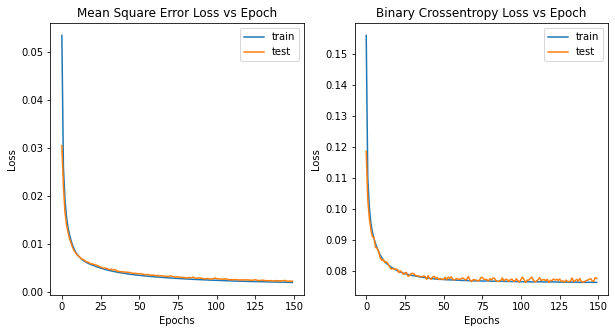

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(deep_ae_metadata_mse.history['loss'])
ax[0].plot(deep_ae_metadata_mse.history['val_loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(['train', 'test'], loc='upper right')
ax[0].set_title('Mean Square Error Loss vs Epoch')
ax[1].plot(deep_ae_metadata_bce.history['loss'])
ax[1].plot(deep_ae_metadata_bce.history['val_loss'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['train', 'test'], loc='upper right')
ax[1].set_title('Binary Crossentropy Loss vs Epoch')

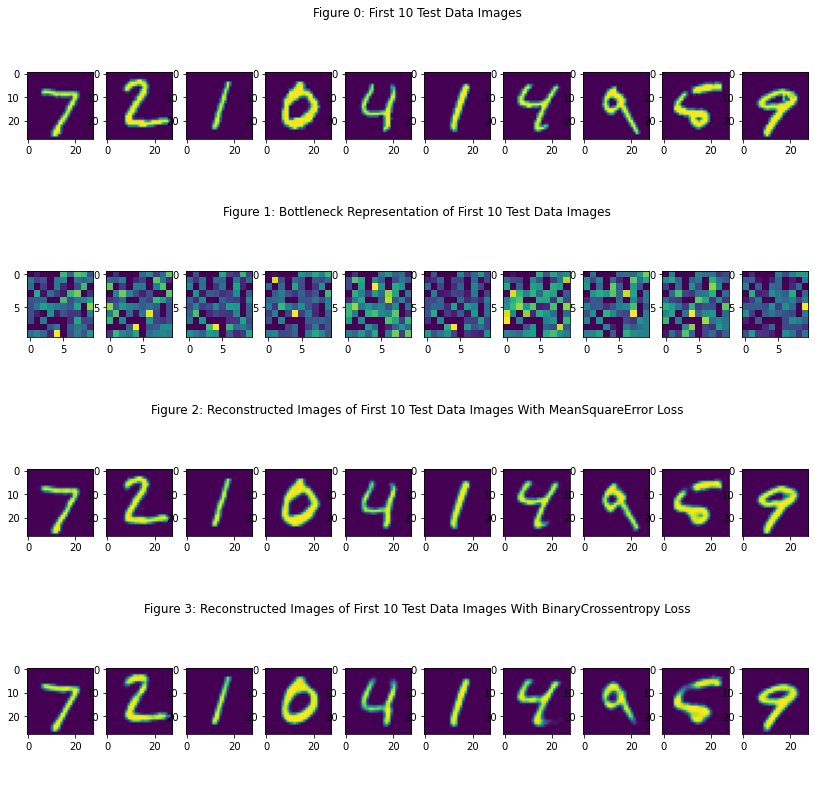

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
fig, ax = plt.subplots(4, 10, figsize = (14, 14))
grid = plt.GridSpec(4, 1)

subtitles = ['First 10 Test Data Images',
             'Bottleneck Representation of First 10 Test Data Images',
             'Reconstructed Images of First 10 Test Data Images With MeanSquareError Loss',
             'Reconstructed Images of First 10 Test Data Images With BinaryCrossentropy Loss']
for i in range(4):
  row = fig.add_subplot(grid[i])
  row.set_title(f'Figure {i}: ' + subtitles[i])
  row.set_axis_off()

for i in range(10):
  ax[0][i].imshow(data_test[i].reshape(28, 28))
  ax[1][i].imshow(deep_ae_hl[i].reshape(10, 10))
  ax[2][i].imshow(reconstructions_mse[i].reshape(28, 28))
  ax[3][i].imshow(reconstructions_bce[i].reshape(28, 28))

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error

ANSWER: Sigmoid having exponentital along with binary cross entropy loss makes the gradient to be consistent and non-saturating thus makes a good pair. Whereas same goes for linear output grouped with Mean Square error loss as the gradient we get is consistent and non-saturating.
 

2.  Question 5: Which loss function is better and why?

ANSWER: Binary Crossentropy loss is better choice here as thegradient will not saturate quickly. Whereas using mean square error the loss quickly reaches close to zero, the updates gets close to zero and training may stall out.

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

ANSWER: We could have used Relu as the activation function to represent the intensity from range [0, 255]. Relu would have directly the intensity value too pass through if the neuron is activated and would have limited the non-active ones to 0.